In [1]:
import os
import statistics
from typing import Dict, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def load_csv_results():
    normal_scenarios = ["feature_importance", "operator_impact", "data_corruption", "data_cleaning"]
    image_scenarios = ["data_corruption", "data_cleaning"]
    normal_datasets = ["healthcare", "folktables", "cardio", "reviews"]
    image_dataset = ["sneakers"]
    data_loadings = ["fast_loading", "slow_loading"]
    featurizations = ["featurization_0", "featurization_1", "featurization_2", "featurization_3", "featurization_4"]
    models = ["logistic_regression", "xgboost", "neural_network"]
    result_df = None
    for scenario in normal_scenarios:
        for dataset in normal_datasets:
            for data_loading in data_loadings:
                for featurization in featurizations:
                    for model in models:
                        filepath = f"{os.getcwd()}/end-to-end-benchmark-results/" \
                                   f"results-{scenario}-{dataset}-{data_loading}-{featurization}-{model}.csv"
                        new_df = pd.read_csv(filepath)
                        new_df['median_no_opt'] = new_df['total_exec_duration_without_opt'].median()
                        new_df['median_opt'] = new_df['total_exec_duration_with_opt'].median()
                        new_df['median_speedup'] = new_df['median_no_opt'] / new_df['median_opt']
                        new_df['opt_original_pipeline_estimated'] = new_df['opt_original_pipeline_estimated'].median()

                        new_df['median_model_training_opt'] = new_df['opt_original_pipeline_model_training'].median() \
                                                              + new_df['opt_what_if_execution_combined_model_training'].median()
                        new_df['median_model_training_no_opt'] = new_df['opt_original_pipeline_model_training'].median() \
                                                              + new_df['no_opt_what_if_execution_combined_model_training'].median()
                        new_df['median_opt_wo_training'] = new_df['median_opt'] - new_df['median_model_training_opt']
                        new_df['median_no_opt_wo_training'] = new_df['median_no_opt'] - \
                                                              new_df['median_model_training_no_opt']
                        new_df['median_speedup_excluding_model_training'] = new_df['median_no_opt_wo_training'] / \
                                                                            new_df['median_opt_wo_training']

                        # for column in new_df.columns:
                        #     if column.startswith("analysis_result"):
                        #         new_df[column] = median_no_opt / new_df[column].median()
                        new_df['variant_count_including_orig'] = new_df['variant_count'] + 1
                        new_df['max_possible_speedup'] = new_df['variant_count_including_orig'] / 2
                        new_df = new_df[['median_no_opt', 'median_opt', 'median_speedup',
                                         'median_speedup_excluding_model_training',
                                         'opt_original_pipeline_estimated', 'variant_count_including_orig',
                                         'max_possible_speedup', 'scenario', 'dataset',
                                         'data_loading', 'featurization', 'model']]
                        new_df = new_df.head(1)
                        new_df = new_df.round(2)
                        if result_df is None:
                            result_df = new_df
                        else:
                            result_df = pd.concat([result_df, new_df], axis=0)
    for scenario in image_scenarios:
        for dataset in image_dataset:
            for data_loading in data_loadings:
                for featurization in ["image"]:
                    for model in ["image"]:
                        filepath = f"{os.getcwd()}/end-to-end-benchmark-results/" \
                                   f"results-{scenario}-{dataset}-{data_loading}-{featurization}-{model}.csv"
                        new_df = pd.read_csv(filepath)
                        median_no_opt = new_df['total_exec_duration_without_opt'].median()
                        new_df['median_no_opt'] = median_no_opt
                        median_opt = new_df['total_exec_duration_with_opt'].median()
                        new_df['median_opt'] = median_opt
                        median_speedup = median_no_opt / median_opt
                        new_df['median_speedup'] = median_speedup
                        new_df['opt_original_pipeline_estimated'] = new_df['opt_original_pipeline_estimated'].median()

                        new_df['median_model_training_opt'] = new_df['opt_original_pipeline_model_training'].median() \
                                                              + new_df['opt_what_if_execution_combined_model_training'].median()
                        new_df['median_model_training_no_opt'] = new_df['opt_original_pipeline_model_training'].median() \
                                                              + new_df['no_opt_what_if_execution_combined_model_training'].median()
                        new_df['median_opt_wo_training'] = new_df['median_opt'] - new_df['median_model_training_opt']
                        new_df['median_no_opt_wo_training'] = new_df['median_no_opt'] - \
                                                              new_df['median_model_training_no_opt']
                        new_df['median_speedup_excluding_model_training'] = new_df['median_no_opt_wo_training'] / \
                                                                            new_df['median_opt_wo_training']
                        # for column in new_df.columns:
                        #     if column.startswith("analysis_result"):
                        #         new_df[column] = median_no_opt / new_df[column].median()
                        new_df['variant_count_including_orig'] = new_df['variant_count'] + 1
                        new_df['max_possible_speedup'] = new_df['variant_count_including_orig'] / 2
                        new_df = new_df[['median_no_opt', 'median_opt', 'median_speedup',
                                         'median_speedup_excluding_model_training',
                                         'opt_original_pipeline_estimated', 'variant_count_including_orig',
                                         'max_possible_speedup', 'scenario', 'dataset',
                                         'data_loading', 'featurization', 'model']]
                        new_df = new_df.head(1)
                        new_df = new_df.round(2)
                        if result_df is None:
                            result_df = new_df
                        else:
                            result_df = pd.concat([result_df, new_df], axis=0)
    return result_df

In [3]:
median_results = load_csv_results()

In [4]:
median_results_ordered_by_median_speedup = median_results.sort_values(by=['median_speedup'])
median_results_ordered_by_median_speedup.to_csv(f"{os.getcwd()}/end-to-end-benchmark-results/end_to_end_speedup_"
                                                f"overview_ordered_by_median_speedup.csv", index=True)
median_results_ordered_by_median_speedup

,median_no_opt,median_opt,median_speedup,median_speedup_excluding_model_training,opt_original_pipeline_estimated,variant_count_including_orig,max_possible_speedup,scenario,dataset,data_loading,featurization,model
0,1062.38,1071.82,0.99,0.97,400.72,2,1.0,operator_impact,cardio,fast_loading,featurization_0,logistic_regression
0,1966.87,1969.85,1.00,0.99,844.37,2,1.0,operator_impact,cardio,fast_loading,featurization_0,xgboost
0,10687.28,10733.35,1.00,0.98,5255.19,2,1.0,operator_impact,cardio,fast_loading,featurization_0,neural_network
0,3146.19,3121.97,1.01,1.02,1306.48,2,1.0,operator_impact,folktables,fast_loading,featurization_0,logistic_regression
0,7434.22,7336.14,1.01,1.04,3358.81,2,1.0,operator_impact,folktables,fast_loading,featurization_0,neural_network
...,...,...,...,...,...,...,...,...,...,...,...,...
0,63574.28,4416.71,14.39,13.65,1939.64,31,15.5,data_corruption,healthcare,fast_loading,featurization_1,xgboost
0,65978.98,4426.04,14.91,13.86,1957.33,31,15.5,data_corruption,healthcare,slow_loading,featurization_2,xgboost
0,56376.38,3736.61,15.09,4.67,1163.73,34,17.0,data_corruption,cardio,fast_loading,featurization_3,xgboost
0,74809.10,4705.74,15.90,13.50,1979.33,31,15.5,data_corruption,healthcare,fast_loading,featurization_3,xgboost


In [5]:
median_results_ordered_by_median_speedup_excluding_model_training = median_results\
    .sort_values(by=['median_speedup_excluding_model_training'])
median_results_ordered_by_median_speedup_excluding_model_training.to_csv(f"{os.getcwd()}/end-to-end-benchmark-results/"
                                                                         f"end_to_end_speedup_overview_ordered_by_"
                                                                         f"median_speedup_excluding_model_training.csv",
                                                                         index=True)
median_results_ordered_by_median_speedup_excluding_model_training

,median_no_opt,median_opt,median_speedup,median_speedup_excluding_model_training,opt_original_pipeline_estimated,variant_count_including_orig,max_possible_speedup,scenario,dataset,data_loading,featurization,model
0,1062.38,1071.82,0.99,0.97,400.72,2,1.0,operator_impact,cardio,fast_loading,featurization_0,logistic_regression
0,10687.28,10733.35,1.00,0.98,5255.19,2,1.0,operator_impact,cardio,fast_loading,featurization_0,neural_network
0,1966.87,1969.85,1.00,0.99,844.37,2,1.0,operator_impact,cardio,fast_loading,featurization_0,xgboost
0,3146.19,3121.97,1.01,1.02,1306.48,2,1.0,operator_impact,folktables,fast_loading,featurization_0,logistic_regression
0,3211.05,3165.98,1.01,1.04,1343.34,2,1.0,operator_impact,folktables,slow_loading,featurization_0,logistic_regression
...,...,...,...,...,...,...,...,...,...,...,...,...
0,56120.58,4010.40,13.99,13.99,1770.68,31,15.5,data_corruption,healthcare,slow_loading,featurization_1,logistic_regression
0,61445.62,4340.17,14.16,14.02,1933.18,31,15.5,data_corruption,healthcare,fast_loading,featurization_0,xgboost
0,54636.43,3885.72,14.06,14.06,1758.29,31,15.5,data_corruption,healthcare,fast_loading,featurization_0,logistic_regression
0,55885.58,3945.64,14.16,14.16,1765.32,31,15.5,data_corruption,healthcare,slow_loading,featurization_0,logistic_regression


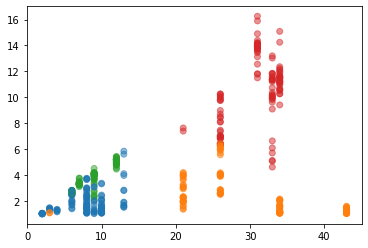

In [7]:
def speedup_scatter_plot(x, y, colors):
    plt.scatter(x, y, c=colors, alpha=0.5)
    plt.show()

x = median_results['variant_count_including_orig']
y = median_results['median_speedup']

In [ ]:
color_map = {
    'operator_impact': 'tab:blue',
    'feature_importance': 'tab:green',
    'data_cleaning': 'tab:orange',
    'data_corruption': 'tab:red'
}
colors = median_results['scenario'].map(color_map)
speedup_scatter_plot(x, y, colors)

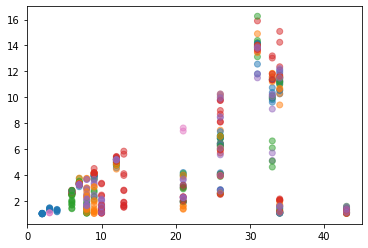

In [9]:
color_map = {
    'featurization_0': 'tab:blue',
    'featurization_1': 'tab:green',
    'featurization_2': 'tab:orange',
    'featurization_3': 'tab:red',
    'featurization_4': 'tab:purple',
    'image': 'tab:pink'
}
colors = median_results['featurization'].map(color_map)
speedup_scatter_plot(x, y, colors)

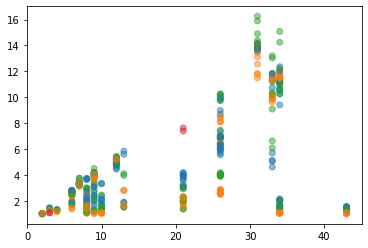

In [10]:
color_map = {
    'logistic_regression': 'tab:blue',
    'xgboost': 'tab:green',
    'neural_network': 'tab:orange',
    'image': 'tab:red'
}
colors = median_results['model'].map(color_map)
speedup_scatter_plot(x, y, colors)

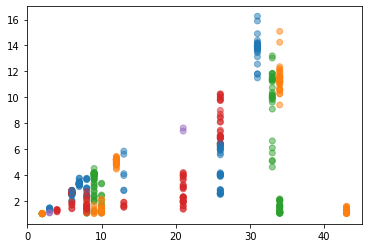

In [11]:
color_map = {
    'healthcare': 'tab:blue',
    'folktables': 'tab:green',
    'cardio': 'tab:orange',
    'reviews': 'tab:red',
    'sneakers': 'tab:purple',
}
colors = median_results['dataset'].map(color_map)
speedup_scatter_plot(x, y, colors)